# Proyecto Machine Learning
+ # Bank Customer Churn Detection
![imagen](../img/img3.png)
+ ## **Modelos Basline:**: "Churn_processed.csv"

Librerías necesarias:

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
import pickle
import yaml

Leemos el Dataset de "Train_churn_processed.csv"

In [3]:
df_train = pd.read_csv("../data_processed/Train_Churn_processed.csv")
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1,2,0,464,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,1,3,0,456,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1,3,0,377,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0,5,1,350,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0,5,1,425,0


Sacamos X e y . Además, dividimos en train y test:

In [4]:
X = df_train.drop(columns=["Exited"])
y = df_train["Exited"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (10000, 14)
Train features shape: (8000, 14)
Train target shape: (8000,)
Test features shape: (2000, 14)
Test target shape: (2000,)


In [6]:
print("Distribución del Target en y:\n", y.value_counts(normalize=True))
print("-"*35)
print("Distribución del Target en y_train:\n", y_train.value_counts(normalize=True))
print("-"*35)
print("Distribución del Target en y_test:\n", y_test.value_counts(normalize=True))

Distribución del Target en y:
 Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64
-----------------------------------
Distribución del Target en y_train:
 Exited
0    0.798
1    0.202
Name: proportion, dtype: float64
-----------------------------------
Distribución del Target en y_test:
 Exited
0    0.789
1    0.211
Name: proportion, dtype: float64


Modelos: 
1. Logistic Regression
2. Random Forest Classifier
3. SVC

1. Logistic Regression

In [7]:
reg_log = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("reglog", LogisticRegression())
])

reg_log_param = {
    "reglog__penalty": ['l2', 'none'],
    "reglog__C": np.logspace(0, 4, 10)}

gs_reg_log = GridSearchCV(reg_log,
                         reg_log_param,
                         cv = 10,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)

gs_reg_log.fit(X_train, y_train)

print(gs_reg_log.best_score_)
print(gs_reg_log.best_params_)
print(gs_reg_log.best_estimator_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
0.998140480024538
{'reglog__C': 1.0, 'reglog__penalty': 'l2'}
Pipeline(steps=[('scaler', StandardScaler()), ('reglog', LogisticRegression())])


In [8]:
final_model = gs_reg_log.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [9]:
print("accuracy_score", accuracy_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.9975
precision_score 0.9905882352941177
recall_score 0.9976303317535545
roc_auc_score 0.9975477387538368
confusion_matrix
 [[1574    4]
 [   1  421]]


2. Random Forest Classifier

In [10]:
rnf_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", RandomForestClassifier())
])

rnf_param = {
    "selectkbest__k": [1, 2, 3], 
    "classifier__n_estimators": [10, 100, 1000],
    "classifier__max_features": [1, 2, 3]
}

gs_rnf = GridSearchCV(rnf_pipe,
                         rnf_param,
                         cv = 10,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)

gs_rnf.fit(X_train, y_train)

print(gs_rnf.best_score_)
print(gs_rnf.best_params_)
print(gs_rnf.best_estimator_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
0.998140480024538
{'classifier__max_features': 1, 'classifier__n_estimators': 10, 'selectkbest__k': 1}
Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=1)),
                ('classifier',
                 RandomForestClassifier(max_features=1, n_estimators=10))])


In [11]:
final_model = gs_rnf.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("accuracy_score", accuracy_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.9975
precision_score 0.9905882352941177
recall_score 0.9976303317535545
roc_auc_score 0.9975477387538368
confusion_matrix
 [[1574    4]
 [   1  421]]


3. SVC

In [12]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", SVC())
])

svm_params = {
    'selectkbest__k':np.arange(5,10),
    'classifier': [SVC()],
    'classifier__C': [0.1,1,10]
}
gs_svc = GridSearchCV(rnf_pipe,
                         svm_params,
                         cv = 4,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)

gs_svc.fit(X_train, y_train)

print(gs_svc.best_score_)
print(gs_svc.best_params_)
print(gs_svc.best_estimator_)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
0.9981435643564356
{'classifier': SVC(), 'classifier__C': 0.1, 'selectkbest__k': 5}
Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=5)),
                ('classifier', SVC(C=0.1))])


In [13]:
final_model = gs_svc.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("accuracy_score", accuracy_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.9975
precision_score 0.9905882352941177
recall_score 0.9976303317535545
roc_auc_score 0.9975477387538368
confusion_matrix
 [[1574    4]
 [   1  421]]


Abordamos el problema del desbalance de los datos en el target "Exited":

1. Submuestreo (Undersampling):
Esta estrategia implica reducir la cantidad de instancias de la clase mayoritaria (en este caso, 0) para igualarla con la cantidad de instancias de la clase minoritaria (en este caso, 1).

2. Nos centraremos en el scoring de "recall": 
Mide la proporción de instancias positivas correctamente clasificadas entre todas las instancias que realmente son positivas. En este caso, el costo de los falsos negativos es alto y queremos identificar la mayor cantidad posible de casos positivos.

In [14]:
rus = RandomUnderSampler(random_state=10)

X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

,count
Exited,
0,1616
1,1616


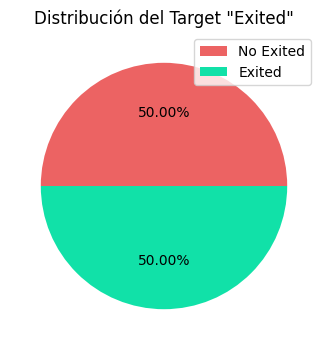

In [34]:
colores = ['#ec6363', '#11e1a8']
plt.figure(figsize=(4,4))
plt.pie(y_train_resampled.value_counts(),
        autopct='%1.2f%%',
        colors=colores)
plt.title('Distribución del Target "Exited"')
plt.legend(['No Exited', 'Exited'], loc='upper right');

exited_situacion = pd.DataFrame(y_train_resampled.value_counts())
exited_situacion

In [16]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()), 
    ("classifier", RandomForestClassifier())
])
log_params = {
    'selectkbest__k':np.arange(5,13),
    'classifier': [LogisticRegression()],
    'classifier__C': [0.1,1,10]
}
rf_params = {
    'scaler': [StandardScaler(), None],
    'selectkbest__k':np.arange(5,13),
    'classifier': [RandomForestClassifier()],
    'classifier__max_depth': [3,5,7]
}

knn_params = {
    'selectkbest__k':np.arange(5,13),
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': np.arange(5,15)
}
svm_params = {
    'selectkbest__k':np.arange(5,13),
    'classifier': [SVC()],
    'classifier__C': [0.1,1,10]
}
search_space = [
    log_params,
    rf_params,
    knn_params,
    svm_params   
]


In [17]:
clf_gs = GridSearchCV(estimator=pipe, param_grid=search_space, cv=10, scoring="recall", verbose=3, n_jobs=-1)
clf_gs.fit(X_train_resampled, y_train_resampled)

print(clf_gs.best_estimator_)
print(clf_gs.best_score_)
print(clf_gs.best_params_)

final_model_gs = clf_gs.best_estimator_
final_model_gs.fit(X_train_resampled, y_train_resampled)
y_pred = final_model_gs.predict(X_test)

print("accuracy_score", accuracy_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

Fitting 10 folds for each of 176 candidates, totalling 1760 fits


Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=5)),
                ('classifier', LogisticRegression(C=0.1))])
0.9981481481481482
{'classifier': LogisticRegression(), 'classifier__C': 0.1, 'selectkbest__k': 5}
accuracy_score 0.9975
precision_score 0.9905882352941177
recall_score 0.9976303317535545
roc_auc_score 0.9975477387538368
confusion_matrix
 [[1574    4]
 [   1  421]]


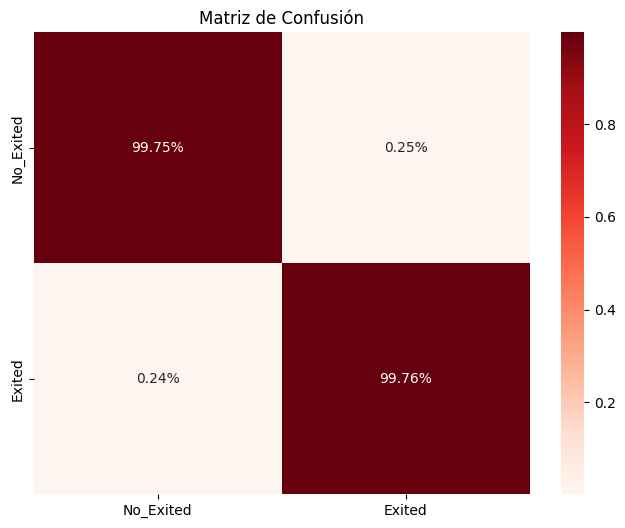

In [18]:
conf_matrix_test = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt=".2%", cmap='Reds', xticklabels=['No_Exited', 'Exited'], yticklabels=['No_Exited', 'Exited'])
plt.title('Matriz de Confusión');

Probamos en "Test_Churn_processed.cs"

In [19]:
df_test = pd.read_csv("../data_processed/Test_Churn_processed.csv")
df_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,747,2,0,36,8,102603.30,2,1,1,180693.61,0,3,1,751,0
1,707,1,0,32,9,0.00,2,1,0,126475.79,0,2,2,947,0
2,590,1,0,37,1,0.00,2,0,0,133535.99,0,2,1,930,0
3,603,1,0,57,6,105000.85,2,1,1,87412.24,1,3,0,281,1
4,615,0,0,45,5,0.00,2,1,1,164886.64,0,4,0,537,0


In [20]:
X_t = df_test.drop(columns=["Exited"])
y_t = df_test["Exited"]

In [21]:
y_pred_test = final_model_gs.predict(X_t)
y_pred_test

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [22]:
X_t.shape

(2000, 14)

In [23]:
y_t.shape

(2000,)

In [24]:
print("accuracy_score", accuracy_score(y_pred_test, y_t))
print("precision_score", precision_score(y_pred_test, y_t))
print("recall_score", recall_score(y_pred_test, y_t))
print("roc_auc_score", roc_auc_score(y_pred_test, y_t))
print("confusion_matrix\n", confusion_matrix(y_pred_test, y_t))

accuracy_score 0.998
precision_score 0.9974424552429667
recall_score 0.9923664122137404
roc_auc_score 0.9958720673389798
confusion_matrix
 [[1606    1]
 [   3  390]]


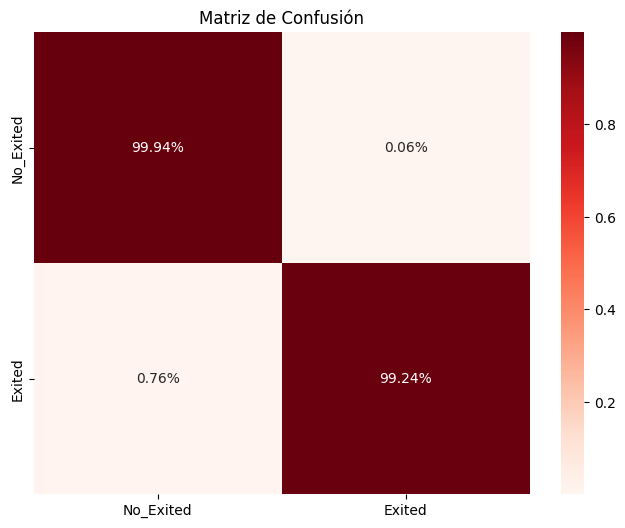

In [25]:
conf_matrix_test = confusion_matrix(y_pred_test, y_t, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt=".2%", cmap='Reds', xticklabels=['No_Exited', 'Exited'], yticklabels=['No_Exited', 'Exited'])
plt.title('Matriz de Confusión');

Guardamos el modelo:

In [26]:
filename = '../models/finished_model_gs'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_model_gs, archivo_salida)

In [27]:
model_info = {'classifier': SVC(), 
              'classifier__C': 0.1, 
              'selectkbest__k': 6}

with open('../models/final_model_gs.yaml', 'w') as yaml_file:
    yaml.dump(model_info, yaml_file)

In [28]:
with open(filename, 'rb') as archivo_entrada:
    modelo_importado = pickle.load(archivo_entrada)

In [29]:
modelo_importado

Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=5)),
                ('classifier', LogisticRegression(C=0.1))])

In [30]:
modelo_importado.predict(X_t)

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

Prueba de nuevos valores:

In [31]:
nuevos_valores = {
    'CreditScore': [700, 650, 800],
    'Geography': [1, 0, 1],
    'Gender': [0, 1, 0],
    'Age': [30, 35, 28],
    'Tenure': [5, 2, 7],
    'Balance': [50000.0, 120000.0, 80000.0],
    'NumOfProducts': [2, 1, 3],
    'HasCrCard': [1, 0, 1],
    'IsActiveMember': [1, 1, 0],
    'EstimatedSalary': [90000.0, 110000.0, 75000.0],
    'Complain': [1, 0, 0],
    'Satisfaction Score': [4, 3, 5],
    'Card Type': [1, 2, 3],
    'Point Earned': [400, 300, 500]
}

nuevos_df = pd.DataFrame(nuevos_valores)
nuevos_df



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,700,1,0,30,5,50000.0,2,1,1,90000.0,1,4,1,400
1,650,0,1,35,2,120000.0,1,0,1,110000.0,0,3,2,300
2,800,1,0,28,7,80000.0,3,1,0,75000.0,0,5,3,500


In [32]:
modelo_importado.predict(nuevos_df)

array([1, 0, 0], dtype=int64)